# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from requests.utils import requote_uri
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
fill_url = requests.utils.requote_uri
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print()
print(f"Total number of cities: {total_cities}")


Total number of cities: 631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set variables needed for analysis
city_weather = []
cou = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
city_num = 1
city_set = 1 

# Language to show processing
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# Pull data to create dataframe
for city in cities:
    try:
        final_url = fill_url(query_url + city)
#         print(final_url)
        response = requests.get(final_url).json()
#         print(response)
        city_weather.append(response['name'])
        cou.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

        print(f"Processing Record {city_num} of set {city_set} | {city}")
        
        # Add one to city count
        city_num += 1 
    
    except (KeyError):
        print("City not found....Skipping............")
        
    #Create sets of 50
    if city_num == 51:
        city_set += 1
        city_num = 1

print('''
-----------------------------
Data Retrieval Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | saint-joseph
Processing Record 2 of set 1 | vaini
Processing Record 3 of set 1 | chokurdakh
Processing Record 4 of set 1 | romanovskaya
Processing Record 5 of set 1 | longyearbyen
Processing Record 6 of set 1 | sabang
Processing Record 7 of set 1 | cape town
Processing Record 8 of set 1 | isangel
Processing Record 9 of set 1 | punta arenas
Processing Record 10 of set 1 | thompson
City not found....Skipping............
Processing Record 11 of set 1 | upernavik
Processing Record 12 of set 1 | lorengau
Processing Record 13 of set 1 | jamestown
Processing Record 14 of set 1 | hovd
Processing Record 15 of set 1 | letka
Processing Record 16 of set 1 | pitimbu
Processing Record 17 of set 1 | hermanus
Processing Record 18 of set 1 | tabuk
Processing Record 19 of set 1 | axim
Processing Record 20 of set 1 | saint-philippe
Processing Record 21 of set 1 | ushuaia
City not found....

Processing Record 30 of set 4 | tasiilaq
Processing Record 31 of set 4 | genhe
City not found....Skipping............
Processing Record 32 of set 4 | touros
City not found....Skipping............
Processing Record 33 of set 4 | teacapan
Processing Record 34 of set 4 | nhulunbuy
Processing Record 35 of set 4 | mayo
Processing Record 36 of set 4 | tuy hoa
Processing Record 37 of set 4 | unai
Processing Record 38 of set 4 | bubaque
Processing Record 39 of set 4 | balkanabat
Processing Record 40 of set 4 | asau
Processing Record 41 of set 4 | kingsport
Processing Record 42 of set 4 | imeni poliny osipenko
Processing Record 43 of set 4 | cayenne
Processing Record 44 of set 4 | douentza
Processing Record 45 of set 4 | kirkwall
Processing Record 46 of set 4 | cabo san lucas
Processing Record 47 of set 4 | kourou
Processing Record 48 of set 4 | iqaluit
City not found....Skipping............
Processing Record 49 of set 4 | mekhe
Processing Record 50 of set 4 | pangnirtung
Processing Record 1 of

Processing Record 16 of set 8 | santa vitoria do palmar
Processing Record 17 of set 8 | sistranda
Processing Record 18 of set 8 | sulangan
Processing Record 19 of set 8 | topeka
Processing Record 20 of set 8 | mackay
Processing Record 21 of set 8 | peyima
Processing Record 22 of set 8 | alyangula
Processing Record 23 of set 8 | garbolovo
City not found....Skipping............
Processing Record 24 of set 8 | comodoro rivadavia
Processing Record 25 of set 8 | kalevala
Processing Record 26 of set 8 | maneadero
Processing Record 27 of set 8 | manta
Processing Record 28 of set 8 | playas
Processing Record 29 of set 8 | kita
Processing Record 30 of set 8 | kiama
Processing Record 31 of set 8 | qingyuan
Processing Record 32 of set 8 | sal rei
Processing Record 33 of set 8 | zhuhai
City not found....Skipping............
Processing Record 34 of set 8 | berdigestyakh
Processing Record 35 of set 8 | dalbandin
Processing Record 36 of set 8 | honiara
Processing Record 37 of set 8 | port hardy
Proce

Processing Record 1 of set 12 | gus-zheleznyy
Processing Record 2 of set 12 | ust-kuyga
Processing Record 3 of set 12 | porto novo
Processing Record 4 of set 12 | cowra
Processing Record 5 of set 12 | la romana
Processing Record 6 of set 12 | syava
Processing Record 7 of set 12 | yazman
Processing Record 8 of set 12 | marienburg
Processing Record 9 of set 12 | tual
Processing Record 10 of set 12 | damietta
Processing Record 11 of set 12 | bekovo
Processing Record 12 of set 12 | turukhansk
Processing Record 13 of set 12 | taybad
Processing Record 14 of set 12 | rocha
City not found....Skipping............
Processing Record 15 of set 12 | tamandare
Processing Record 16 of set 12 | jacareacanga
Processing Record 17 of set 12 | coos bay
Processing Record 18 of set 12 | novyy yarychiv
City not found....Skipping............
Processing Record 19 of set 12 | nuevo casas grandes
Processing Record 20 of set 12 | santa rosa
Processing Record 21 of set 12 | la union
Processing Record 22 of set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to hold all cities
weather_dict = {
    'City' : city_weather,
    'Country' : cou, 
    'Latitude' : lat,
    'Longitude' : long,
    'Temperature' : temp,
    'Humidity' : humid,
    'Cloudiness' : cloud, 
    'Wind Speed': wind
}

# Convert to DataFrame
weather_data = pd.DataFrame(weather_dict)

#Export to CSV
weather_data.to_csv("Outputs/Weather_Data", index=False, header=True)

weather_data

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Saint-Joseph,RE,-21.3667,55.6167,23.24,61,75,5.66
1,Vaini,TO,-21.2000,-175.2000,30.00,79,75,4.12
2,Chokurdakh,RU,70.6333,147.9167,-27.66,79,73,1.91
3,Romanovskaya,RU,47.5426,42.0285,5.68,90,99,4.05
4,Longyearbyen,SJ,78.2186,15.6401,-18.00,71,40,6.17
...,...,...,...,...,...,...,...,...
577,Boromo,BF,11.7500,-2.9333,26.49,15,4,3.51
578,Barra de Tecoanapa,MX,16.5167,-98.7500,26.83,70,0,4.12
579,Tekeli,KZ,44.8300,78.8239,-0.82,92,100,3.31
580,Berbera,SO,10.4396,45.0143,22.87,74,74,2.57


In [5]:
#Statistical summary
weather_data.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,22.069009,16.214367,8.286306,74.340206,56.893471,3.590412
std,32.701275,89.244045,18.354375,18.920007,38.041001,2.895798
min,-54.800000,-179.166700,-42.000000,8.000000,0.000000,0.160000
25%,-3.766975,-62.616250,-5.705000,66.000000,19.000000,1.540000
50%,26.751400,24.369400,15.270000,79.000000,75.000000,3.090000
75%,49.458325,89.764375,23.707500,88.000000,90.000000,4.660000
max,78.218600,178.416700,32.220000,100.000000,100.000000,21.090000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

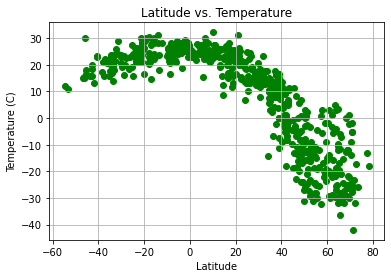

In [6]:
#Define variables
lat = weather_data['Latitude']
temp = weather_data['Temperature']

#Plot
plt.scatter(lat, temp, color='green')

#Lable
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Latitude vs. Temperature')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Temperature.png")

The plot above shows how the temperature changes across the globe. Since we know the equator to be zero we can see that the highest temperatures are closest to zero and the temperature decreases as you move away from the equator, latitude 0.

### Latitude vs. Humidity Plot

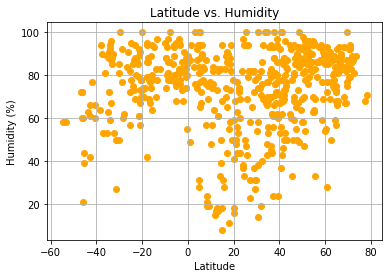

In [7]:
#Define new variables
humid = weather_data['Humidity']

#Plot
plt.scatter(lat, humid, color='orange')

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Humidity.png")

The plot above shows humidity levels across the globe. There does not seem to be a correlation between humidity and location.

### Latitude vs. Cloudiness Plot

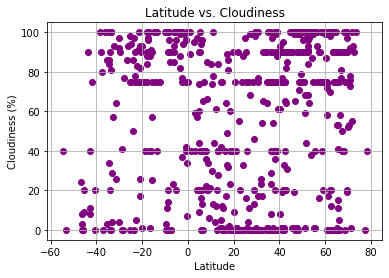

In [8]:
#Define new variables 
cloud = weather_data['Cloudiness']

#Plot
plt.scatter(lat, cloud, color='purple')

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid('true')


#Save file as png
plt.savefig("Outputs/Latitude vs. Cloudiness.png")

The plot above shows percent cloudiness across the globe. There appears to be some consistency between some temperatures and cloudiness but more statistical tests are needed to established correlation.

### Latitude vs. Wind Speed Plot

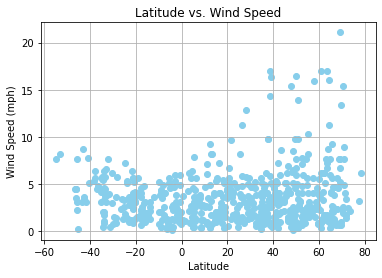

In [9]:
#Add new variables 
wind = weather_data['Wind Speed']

#Plot
plt.scatter(lat, wind, color='skyblue')

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')
plt.grid('true')

#Save file as png
plt.savefig("Outputs/Latitude vs. Wind Speed.png")

The plot above shows the windspeed across the globe. In general, there seems to be few instances of extremely high wind speed as most speeds are clustered around the bottom of the plot.

## Linear Regression

In [10]:
#Establish north and south hemisphere dataframes

north = weather_data.loc[weather_data['Latitude'] >= 0]
north.head()
# print(len(north))
south = weather_data.loc[weather_data['Latitude'] < 0]
# print(len(south))

### Temperature vs. Latitude Linear Regression

####  Northern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: 0.7731554914646417


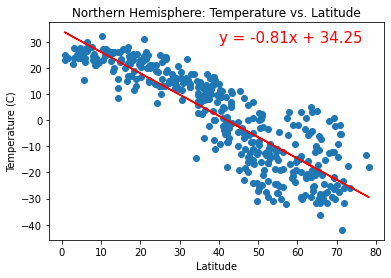

In [11]:
from scipy import stats

#Add associated y_axis
north_lat = north['Latitude']
north_temp = north['Temperature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_temp)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_temp)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.annotate(lneq,(40,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Temperature vs. Latitude Linear Regression

The r-value is: 0.38859563389109436


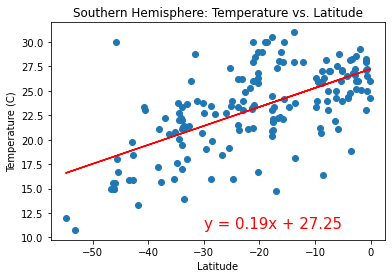

In [25]:
#Add associated y_axis
south_lat = south['Latitude']
south_temp = south['Temperature']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_temp)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_temp)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.annotate(lneq,(-30, 11),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

When looking at temperature vs latitude in the Northern and Southern Hemispheres it is clear that the closer to the equator the higher the temperature. This is shown in the Northern Hemisphere as the temperature decreases as latitude moves further away from 0. This is shown in the Southern Hemisphere as the temperature increases as latitude moves closer to 0. 

## Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09075412992456325


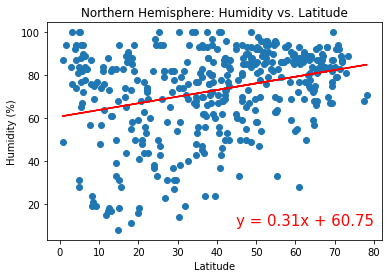

In [13]:
#Add associated y_axis
north_hum = north['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_hum)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_hum)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(45,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14600851533434545


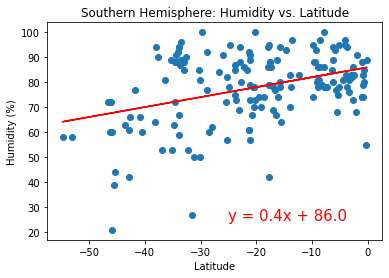

In [19]:
#Add associated y_axis
south_hum = south['Humidity']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_hum)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_hum)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.annotate(lneq,(-25, 25),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

When looking at latitude and humidity there is very little correlation as noted by the low r values. However, it is interesting to note that most humidity across the world lingers, on average, above 50%. 

## Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07828504000762175


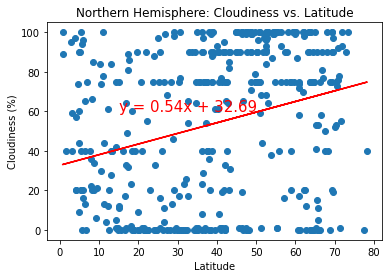

In [15]:
#Add associated y_axis
north_cloud = north['Cloudiness']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_cloud)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(lneq,(15,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10784350634784053


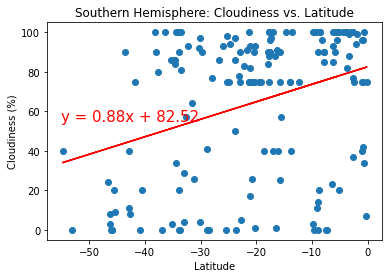

In [16]:
#Add associated y_axis
south_cloud = south['Cloudiness']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_cloud)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(lneq,(-55, 55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

Cloudiness and latitude also have little correlation as noted by the small r value and by the generally even distribution of data points on the plots above.

## Wind Speed vs Latitude Linear Regression

####  Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

The r-value is: 0.021508907112903704


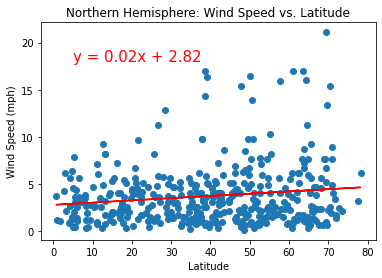

In [24]:
#Add associated y_axis
north_wind = north['Wind Speed']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_lat, north_wind)

# Get regression values
regress_values = north_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(lneq,(5,18),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13379729842230176


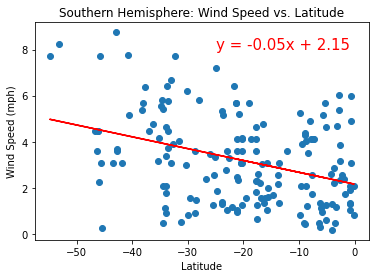

In [21]:
#Add associated y_axis
south_wind = south['Wind Speed']

# Linear regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_lat, south_wind)

# Get regression values
regress_values = south_lat * slope + intercept

#Create line equation for graph
lneq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")

#Label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(lneq,(-25, 8),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

Wind speed and latitude had the smallest r value meaning they have the lowest correlation. However, it is interesting to note most wind speeds across the globe do not exceed 10 miles per hour. 